In [32]:
# load packages
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [33]:
# import and format data
dateparser = lambda x: pd.to_datetime(x, format='%Y%m%d%H')
press = pd.read_csv('press.txt', delimiter=';', usecols=[1, 4], names=['dateTime', 'pressure'], 
                    skiprows=1, parse_dates=['dateTime'], date_parser=dateparser, index_col='dateTime')
temp = pd.read_csv('temp.txt', delimiter=';', usecols=[1, 4, 5], names=['dateTime', 'temperature', 'relative_humidity'], 
                    skiprows=1, parse_dates=['dateTime'], date_parser=dateparser, index_col='dateTime')
rain = pd.read_csv('rain.txt', delimiter=';', usecols=[1, 4], names=['dateTime', 'rain'], 
                    skiprows=1, parse_dates=['dateTime'], date_parser=dateparser, index_col='dateTime')

df = rain
df['atmpress'] = press['pressure']
df['airtemp'] = temp['temperature']
df['relhum'] = temp['relative_humidity']

In [34]:
# check resulting DataFrame
df.head()

rain  atmpress  airtemp  relhum
dateTime                                            
2015-08-20 01:00:00   0.0    1022.4     15.9    92.0
2015-08-20 02:00:00   0.0    1022.6     15.2    93.0
2015-08-20 03:00:00   0.0    1022.9     14.8    87.0
2015-08-20 04:00:00   0.0    1023.2     14.6    70.0
2015-08-20 05:00:00   0.0    1023.7     15.0    63.0

In [35]:
# remove missing data (labeled in this data source as -999)
df = df[df != -999]
df = df.dropna()

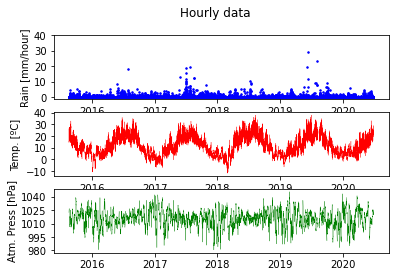

In [36]:
# plot data
plt.close()
plt.figure()
plt.subplot(311)
plt.plot(df['rain'], 'b.', markersize=3)
plt.ylabel('Rain [mm/hour]')
plt.yticks(np.linspace(0, 40, 5))
plt.subplot(312)
plt.plot(df['airtemp'], '-r', linewidth=0.3)
plt.yticks(np.linspace(-10, 40, 6))
plt.ylabel('Temp. [ºC]')
plt.subplot(313)
plt.plot(df['atmpress'], '-g', linewidth=0.3)
plt.ylabel('Atm. Press [hPa]')
plt.yticks(np.linspace(980, 1040, 5))
plt.suptitle('Hourly data')
plt.show()

In [37]:
# define model and prepare input data
model = Perceptron()

data = []
for index, row in df.iterrows():
    data.append({
        "evidence": [float(ij) for ij in row[1:4]],
        "label": 1 if row[0] > 0 else 0
        })

# split training and testing sets
holdout = int(0.40 * len(data))
random.shuffle(data)
testing = data[:holdout]
training = data[holdout:]

# train model
X_training = [row["evidence"] for row in training]
y_training = [row["label"] for row in training]
model.fit(X_training, y_training)

# predict on testing set
X_testing = [row["evidence"] for row in testing]
y_testing = [row["label"] for row in testing]
predictions = model.predict(X_testing)

# prediction quality
corr = 0
incorr = 0
tot = 0
for actual, predicted in zip(y_testing, predictions):
    tot += 1
    if actual == predicted:
        corr += 1
    else:
        incorr += 1

In [38]:
print('True positives = ')
print('True negatives = ')
print('False positives = ')
print('False negatives = ')
print('Recall =')
print('Sensitivity = ')

True positives = 
True negatives = 
False positives = 
False negatives = 
Recall =
Sensitivity = 
